In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [ ]:
df = pd.read_csv('/content/sample_data/mnist_train_small.csv').values

In [ ]:
df.shape

(19999, 785)

In [ ]:
X,Y = df[:,1:],df[:,0]

In [ ]:
X.shape,Y.shape

((19999, 784), (19999,))

In [ ]:
X = np.reshape(X,(19999,1,28,28))

In [ ]:
from sklearn.model_selection import train_test_split
X_test, x_val, Y_test, y_val = train_test_split(X,Y,test_size=0.69, random_state = 22 , shuffle =True)

In [ ]:
X,Y = X_test[0:6000,:,:,:],Y_test[0:6000]

In [ ]:
x_val1,y_val1 = x_val[5000:11000],y_val[5000:11000] 

In [ ]:
X.shape,Y.shape, x_val1.shape,y_val1.shape

((6000, 1, 28, 28), (6000, 1), (6000, 1, 28, 28), (6000, 1))

In [ ]:
 Y = np.reshape(Y,(6000,1))
y_val1 = np.reshape(y_val1,(6000,1))

In [ ]:
from CNN import CNN
from max_pool import max_pool
from NeuralNetwork import NeuralNetwork,one_hot,softmax,loss 

In [ ]:
conv_layer1 = CNN(n_f = 32 , f = 3 , stride = 1 , padding = 'same')
#conv_layer2 = CNN(n_f = 64 , f = 3 , stride = 1 , padding = 'same')
pooling1 = max_pool(f=2,mode = "max",stride=2)
conv_layer3 = CNN(n_f = 32 , f = 3 , stride = 1 , padding = 'same')
#conv_layer4 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
pooling2 = max_pool(f=2,mode = "max",stride=2)
conv_layer5 = CNN(n_f = 64 , f = 3 , stride = 1 , padding = 'same')
# conv_layer6 = CNN(n_f = 64 , f = 3 , stride = 1 , padding = 'same')
# conv_layer7 = CNN(n_f = 64 , f = 3 , stride = 1 , padding = 'same')
# pooling3 = max_pool(f=2,mode = "max",stride=2)
# conv_layer8 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# conv_layer9 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# conv_layer10 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# pooling4 = max_pool(f=2,mode = "max",stride=2)
# conv_layer11 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# conv_layer12 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# conv_layer13 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
pooling5 = max_pool(f=2,mode = "max",stride=2)
neural0 = NeuralNetwork(input_size = 576,layers = (128,64) ,output_size = 10)

In [ ]:
def train(X,Y,epochs,lr1=0.001,logs=True):
    training_loss = []
    
    classes = 10
    Y_OHT = one_hot(Y,classes)
    #print(Y_OHT.shape)

    for ix in range(epochs):

        x_i = X[ix*200:(ix+1)*200,:,:,:]
        y_i = Y_OHT[ix*200:(ix+1)*200,:]
        #print(x_i.shape,y_i.shape)

        #print('---------------------------------------------------------------------------------------------------')
        print("Forward Pass")
        c1 = conv_layer1.Forward_pass(x_i)
        c1[c1<=0] = 0
        #c2 = conv_layer2.Forward_pass(c1)
        p1 = pooling1.Forward_pass(c1)
        c3 = conv_layer3.Forward_pass(p1)
        c3[c3<=0] = 0
        #c4 = conv_layer4.Forward_pass(c3)
        p2 = pooling2.Forward_pass(c3)
        c5 = conv_layer5.Forward_pass(p2)
        c5[c5<=0] = 0
        # c6 = conv_layer6.Forward_pass(c5)
        # c7 = conv_layer7.Forward_pass(c6)
        # p3 = pooling3.Forward_pass(c7)
        # c8 = conv_layer8.Forward_pass(p3)
        # c9 = conv_layer9.Forward_pass(c8)
        # c10 = conv_layer10.Forward_pass(c9)
        # p4 = pooling4.Forward_pass(c10)
        # c11 = conv_layer11.Forward_pass(p4)
        # c12 = conv_layer12.Forward_pass(c11)
        # c13 = conv_layer13.Forward_pass(c12)
        p5 = pooling5.Forward_pass(c5)
        r = np.reshape(p5,(200,-1))
        #print('The Input after Flattening for MLP {}'.format(r.shape))
  
        Y_ = neural0.forward(r)

        l = loss(y_i,Y_)
        training_loss.append(l)

        print('Backword Pass')
        dn1 = neural0.backward(r,y_i,learning_rate=lr1)
        #print("Input shape = {} Output shape = {}".format(r.shape,dn1.shape))

        dr = np.reshape(dn1,p5.shape)
        dp5 = pooling5.Backward_pass(c5,dr)
        dp5[dp5<=0] = 0
        # dc13 = conv_layer13.Backward_pass(c12,dp5)
        # dc12 = conv_layer13.Backward_pass(c11,dc13)
        # dc11 = conv_layer13.Backward_pass(p4,dc12)
        # dp4 = pooling4.Backward_pass(c10,dc11)
        # dc10 = conv_layer10.Backward_pass(c9,dp4)
        # dc9 = conv_layer9.Backward_pass(c8,dc10)
        # dc8 = conv_layer8.Backward_pass(p3,dc9)
        # dp3 = pooling3.Backward_pass(c7,dc8)
        # dc7 = conv_layer7.Backward_pass(c6,dp3)
        # dc6 = conv_layer6.Backward_pass(c5,dc7)
        dc5 = conv_layer5.Backward_pass(p2,dp5,lr = lr1)
        dp2 = pooling2.Backward_pass(c3,dc5)
        dp2[dp2<=0] = 0
        #dc4 = conv_layer4.Backward_pass(c3,dp2)
        dc3 = conv_layer3.Backward_pass(p1,dp2,lr = lr1)
        dp1 = pooling1.Backward_pass(c1,dc3)
        dp1[dp1<=0] = 0
        #dc2 = conv_layer2.Backward_pass(c1,dp1)
        dc1 = conv_layer1.Backward_pass(x_i,dp1,lr = lr1)
        
        if(logs):
            print("Epoch %d Loss %.4f"%(ix,l))
        
        print('---------------------------------------------------------------------------------------------------')
        
            
    
    return training_loss

In [ ]:
def predict(xval,yval,epochs,logs=True):
    z = 0
    
    # classes = 2
    # Y_OHT = one_hot(Y,classes)
    #print(Y_OHT.shape)

    for ix in range(0,epochs):

        e = 0
        x_i = xval[ix*200:(ix+1)*200,:,:,:]
        y_i = yval[ix*200:(ix+1)*200,:]
        #print(x_i.shape,y_i.shape)

        #print('---------------------------------------------------------------------------------------------------')
        #print("Forward Pass")
        c1 = conv_layer1.Forward_pass(x_i)
        c1[c1<=0] = 0
        #c2 = conv_layer2.Forward_pass(c1)
        p1 = pooling1.Forward_pass(c1)
        c3 = conv_layer3.Forward_pass(p1)
        c3[c3<=0] = 0
        #c4 = conv_layer4.Forward_pass(c3)
        p2 = pooling2.Forward_pass(c3)
        c5 = conv_layer5.Forward_pass(p2)
        c5[c5<=0] = 0
        # c6 = conv_layer6.Forward_pass(c5)
        # c7 = conv_layer7.Forward_pass(c6)
        # p3 = pooling3.Forward_pass(c7)
        # c8 = conv_layer8.Forward_pass(p3)
        # c9 = conv_layer9.Forward_pass(c8)
        # c10 = conv_layer10.Forward_pass(c9)
        # p4 = pooling4.Forward_pass(c10)
        # c11 = conv_layer11.Forward_pass(p4)
        # c12 = conv_layer12.Forward_pass(c11)
        # c13 = conv_layer13.Forward_pass(c12)
        p5 = pooling5.Forward_pass(c5)
        r = np.reshape(p5,(200,-1))
        #print('The Input after Flattening for MLP {}'.format(r.shape))

        Y_ = neural0.predict(r)
        Y_ = np.reshape(Y_,(200,1))
        #print(Y_.shape,y_i.shape)
        e = np.sum(Y_ == y_i)
        z = z + e
        #print(e/100)
        #print(z)

    return z/6000

In [ ]:
l_o_s_s = train(X,Y,30)

Forward Pass
Input shape = (200, 1, 28, 28) Filter shape = (32, 1, 3, 3) Output shape = (200, 32, 28, 28)
Input shape = (200, 32, 28, 28) Output shape = (200, 32, 14, 14)
Input shape = (200, 32, 14, 14) Filter shape = (32, 32, 3, 3) Output shape = (200, 32, 14, 14)
Input shape = (200, 32, 14, 14) Output shape = (200, 32, 7, 7)
Input shape = (200, 32, 7, 7) Filter shape = (64, 32, 3, 3) Output shape = (200, 64, 7, 7)
Input shape = (200, 64, 7, 7) Output shape = (200, 64, 3, 3)
Backword Pass
Epoch 0 Loss 12.2275
---------------------------------------------------------------------------------------------------
Forward Pass
Backword Pass
Epoch 1 Loss 12.2354
---------------------------------------------------------------------------------------------------
Forward Pass
Backword Pass
Epoch 2 Loss 4.6849
---------------------------------------------------------------------------------------------------
Forward Pass
Backword Pass
Epoch 3 Loss 10.8119
-----------------------------------------

KeyboardInterrupt: ignored

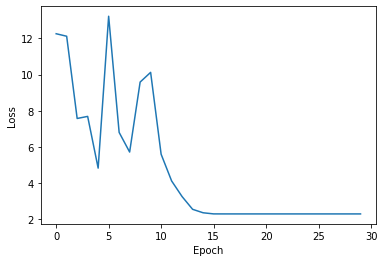

In [ ]:
import matplotlib.pyplot as plt
plt.plot(l_o_s_s)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
s = predict(X,Y,30)
print(s)

0.1025


In [ ]:
s = predict(x_val1,y_val1,30)
print(s)

In [ ]:
l_o_s_s1 = train(X,Y,30)

Forward Pass
Backword Pass
Epoch 0 Loss 2.3026
---------------------------------------------------------------------------------------------------
Forward Pass
Backword Pass
Epoch 1 Loss 2.3026
---------------------------------------------------------------------------------------------------
Forward Pass
Backword Pass
Epoch 2 Loss 2.3026
---------------------------------------------------------------------------------------------------
Forward Pass
Backword Pass
Epoch 3 Loss 2.3026
---------------------------------------------------------------------------------------------------
Forward Pass
Backword Pass
Epoch 4 Loss 2.3026
---------------------------------------------------------------------------------------------------
Forward Pass
Backword Pass
Epoch 5 Loss 2.3026
---------------------------------------------------------------------------------------------------
Forward Pass
Backword Pass
Epoch 6 Loss 2.3026
-----------------------------------------------------------------------

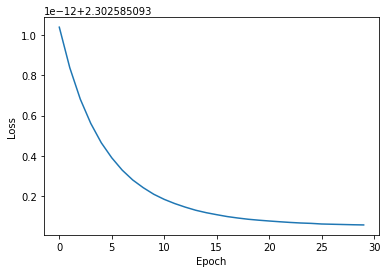

In [ ]:
import matplotlib.pyplot as plt
plt.plot(l_o_s_s1)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [ ]:
s = predict(X,Y,30)
print(s)

0.09733333333333333


In [ ]:
s = predict(x_val1,y_val1,30)
print(s)

0.09116666666666666


In [ ]:
conv_layer1 = CNN(n_f = 32 , f = 3 , stride = 1 , padding = 'same')
#conv_layer2 = CNN(n_f = 64 , f = 3 , stride = 1 , padding = 'same')
pooling1 = max_pool(f=2,mode = "max",stride=2)
conv_layer3 = CNN(n_f = 32 , f = 3 , stride = 1 , padding = 'same')
#conv_layer4 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
pooling2 = max_pool(f=2,mode = "max",stride=2)
conv_layer5 = CNN(n_f = 64 , f = 3 , stride = 1 , padding = 'same')
# conv_layer6 = CNN(n_f = 64 , f = 3 , stride = 1 , padding = 'same')
# conv_layer7 = CNN(n_f = 64 , f = 3 , stride = 1 , padding = 'same')
# pooling3 = max_pool(f=2,mode = "max",stride=2)
# conv_layer8 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# conv_layer9 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# conv_layer10 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# pooling4 = max_pool(f=2,mode = "max",stride=2)
# conv_layer11 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# conv_layer12 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
# conv_layer13 = CNN(n_f = 128 , f = 3 , stride = 1 , padding = 'same')
pooling5 = max_pool(f=2,mode = "max",stride=2)
neural0 = NeuralNetwork(input_size = 576,layers = (128,64) ,output_size = 10)

In [ ]:
s = predict(X,Y,30)
print(s)

Input shape = (200, 28, 28, 1) Filter shape = (3, 3, 1, 32) Output shape = (200, 28, 28, 32)
Input shape = (200, 28, 28, 32) Output shape = (200, 14, 14, 32)
Input shape = (200, 14, 14, 32) Filter shape = (3, 3, 32, 32) Output shape = (200, 14, 14, 32)
Input shape = (200, 14, 14, 32) Output shape = (200, 7, 7, 32)
Input shape = (200, 7, 7, 32) Filter shape = (3, 3, 32, 64) Output shape = (200, 7, 7, 64)
Input shape = (200, 7, 7, 64) Output shape = (200, 3, 3, 64)
0.09783333333333333
